In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X=pd.read_excel('Sensor Data Train.xlsx',sheet_name="5 sensors' data for training")
y=pd.read_excel('Sensor Data Train.xlsx',sheet_name="Corres. Event Recorder's data")

In [3]:
X.shape

(62606, 6)

In [4]:
y.shape

(983, 2)

In [126]:
def closest_observation(t,t1,n):
    d=[]
    ind=[]
    for j,i in t.iteritems():
        if (i.hour==t1.hour) and (i.minute==t1.minute) and (i.second==t1.second):
            d.append(abs(i.microsecond-t1.microsecond))
            ind.append(j)
    a=np.array((d,ind)).T
    mins=[]
    for i in range(n):
        mins.append(a[a.argmin(axis=0)[0]][1])
        a=np.delete(a,a.argmin(axis=0),axis=0)
    return mins

In [164]:
X_n=[]
for i in range(len(y)):
    t=X.iloc[closest_observation(X.Time,y.Time[i],2),1:].values
    X_n.append(np.mean(t,axis=0))

In [165]:
X_n=np.array(X_n)

In [166]:
y_n=y.Event_val.values

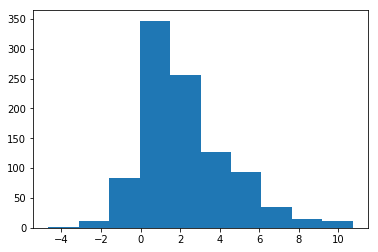

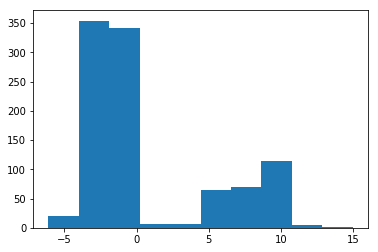

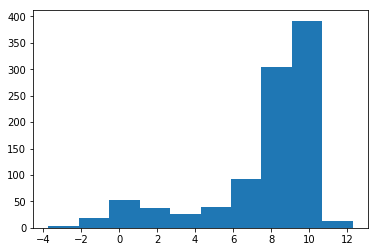

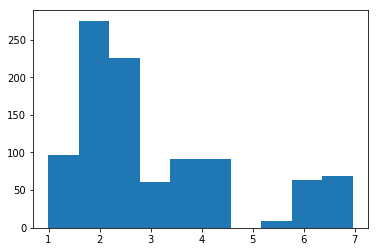

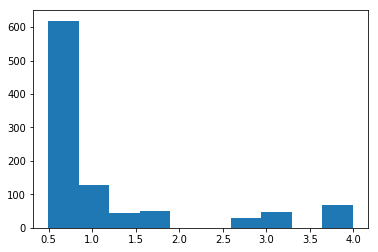

In [167]:
N,D=X_n.shape
for i in range(D):
    plt.hist(X_n[:,i])
    plt.show()

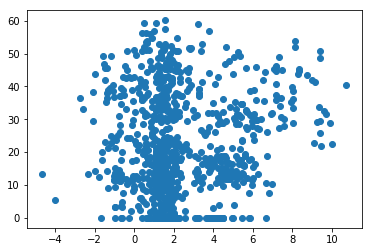

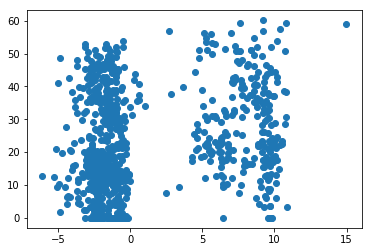

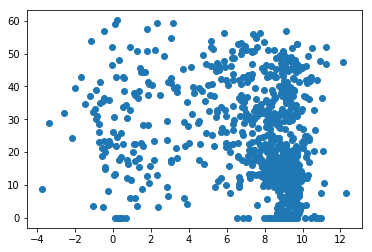

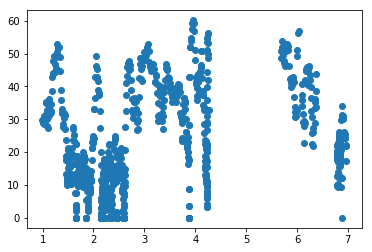

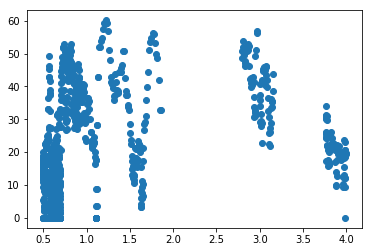

In [168]:
N,D=X_n.shape
for i in range(D):
    plt.scatter(X_n[:,i],y_n)
    plt.show()

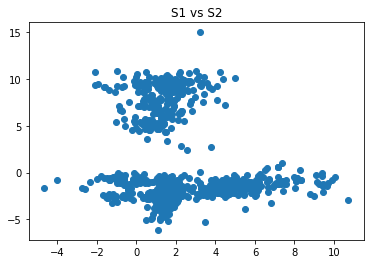

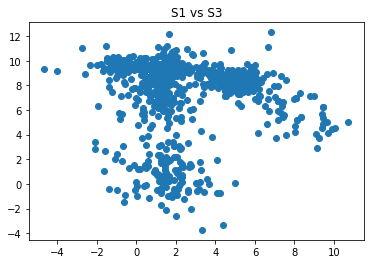

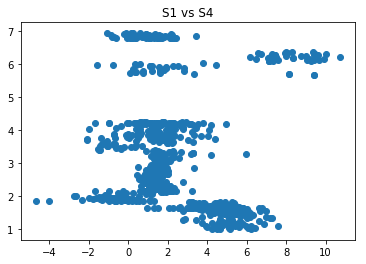

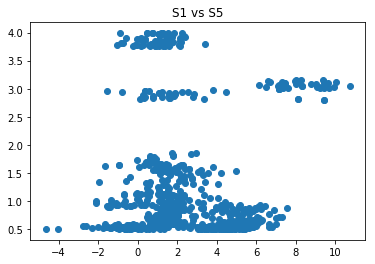

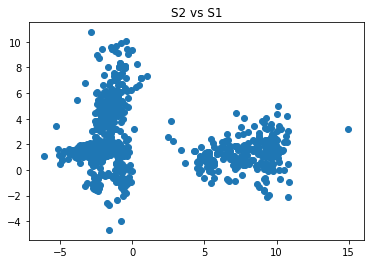

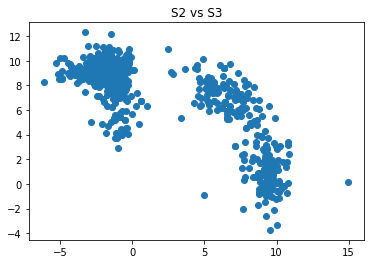

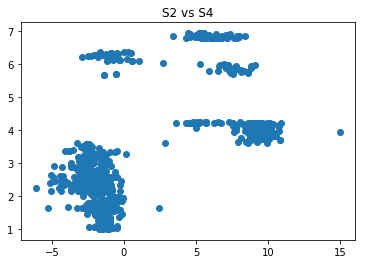

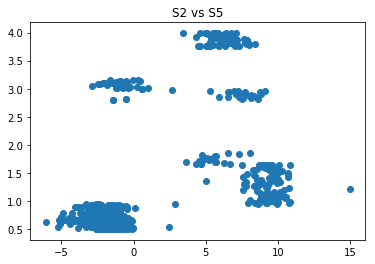

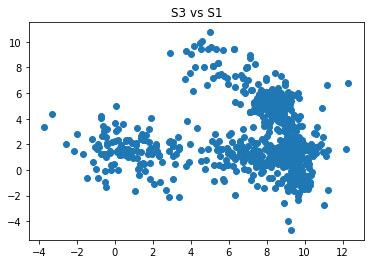

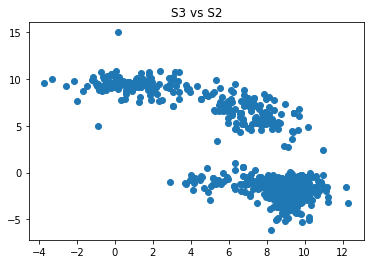

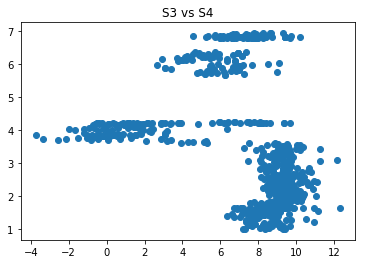

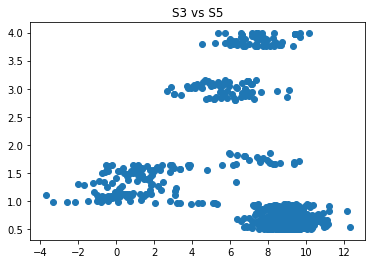

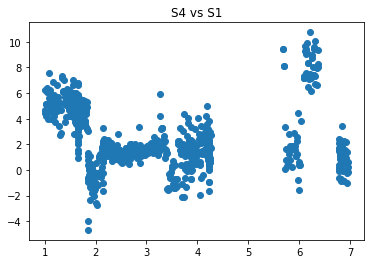

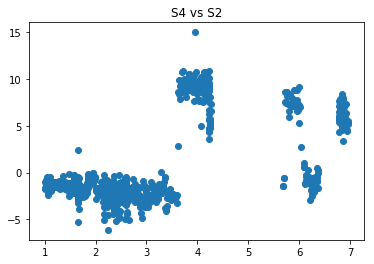

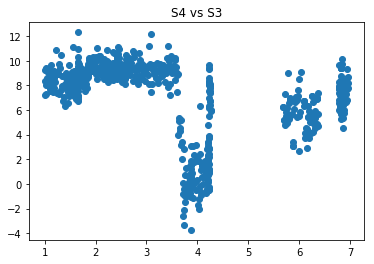

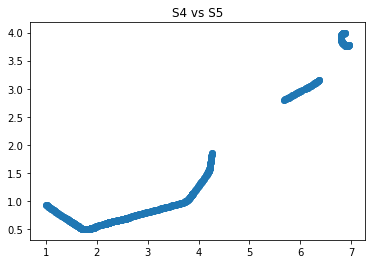

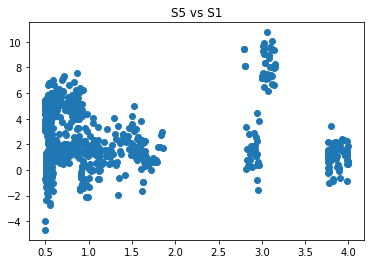

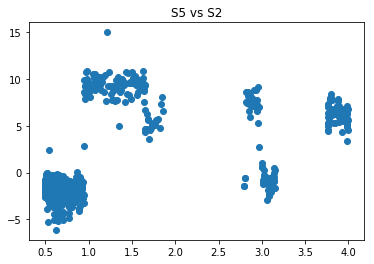

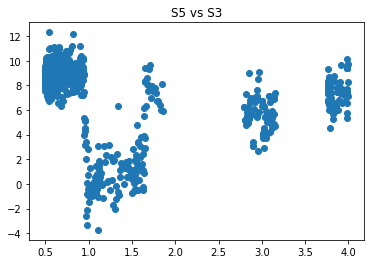

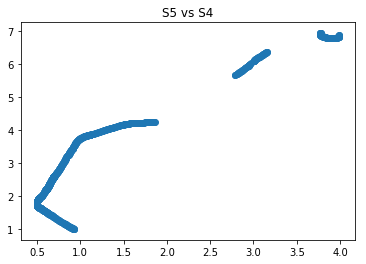

In [172]:
# Correlation between predictors
N,D=X_n.shape
for i in range(D):
    for j in range(D):
        if i!=j:
            plt.scatter(X_n[:,i],X_n[:,j])
            plt.title('S{0} vs S{1}'.format(i+1,j+1))
            plt.show()

In [173]:
# Feature Scaling
stds=[]
means=[]
for i in range(D):
    stds.append(X_n[:,i].std())
    means.append(X_n[:,i].mean())
    X_n[:,i]=(X_n[:,i]-means[i])/(stds[i])

In [174]:
def cost(y,y_p):
    return ((y-y_p)**2).sum()
def r2(y,y_p):
    RSS=((y-y_p)**2).sum()
    TSS=((y-y.mean())**2).sum()
    return (1-(RSS/TSS))

In [180]:
def train_linear(X,y,W,b,lr,epoch):
    N,D=X.shape
    tr_i=np.random.choice(N,int(N*0.8),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_train=X[tr_i]
    y_train=y[tr_i]
    X_test=X[t_i]
    y_test=y[t_i]
    c_t=[]
    c_v=[]
    r2_t=[]
    r2_v=[]
    for i in range(epoch):
        y_p_train=X_train.dot(W)+b
        y_p_test=X_test.dot(W)+b
        W=W-lr*X_train.T.dot(y_p_train-y_train)
        b=b-lr*(y_p_train-y_train).sum(axis=0)
        c_t.append(cost(y_train,y_p_train))
        r2_t.append(r2(y_train,y_p_train))
        c_v.append(cost(y_test,y_p_test))
        r2_v.append(r2(y_test,y_p_test))
        if i % 100==0:
            print('Epoch: {0} Train Cost:{1} Train R2: {2} Test Cost: {3} Test R2: {4}'.format(i,c_t[i],r2_t[i],c_v[i],r2_v[i]))
    return W,b,c_t,c_v,r2_t,r2_v

In [189]:
W=np.random.randn(D)/np.sqrt(D)
b=np.random.randn()
W,b,c_t,c_v,r2_t,r2_v=train_linear(X_n,y_n,W,b,0.00001,100000)

Epoch: 0 Train Cost:507933.1464941402 Train R2: -1.4702096527368687 Test Cost: 138876.74702520517 Test R2: -1.6654054760685928
Epoch: 100 Train Cost:242192.68201957145 Train R2: -0.17784536228111358 Test Cost: 63522.79255483167 Test R2: -0.21916737508323303
Epoch: 200 Train Cost:189367.71815578837 Train R2: 0.07905603614593049 Test Cost: 48413.690188110566 Test R2: 0.07081554177922988
Epoch: 300 Train Cost:178279.28633890464 Train R2: 0.13298193465607389 Test Cost: 44897.997768233756 Test R2: 0.13829081052534886
Epoch: 400 Train Cost:175794.48561760993 Train R2: 0.1450661602460661 Test Cost: 43935.88409009114 Test R2: 0.15675627087960387
Epoch: 500 Train Cost:175107.41893041087 Train R2: 0.14840754242304643 Test Cost: 43595.39830228867 Test R2: 0.16329107748165883
Epoch: 600 Train Cost:174811.01887572947 Train R2: 0.14984901219362412 Test Cost: 43429.89064295843 Test R2: 0.16646759933257782
Epoch: 700 Train Cost:174611.83099150122 Train R2: 0.15081771415317335 Test Cost: 43324.22361797

Epoch: 6600 Train Cost:172267.29299165244 Train R2: 0.16221980601980768 Test Cost: 42008.2618688105 Test R2: 0.1937523478647627
Epoch: 6700 Train Cost:172260.7897952176 Train R2: 0.16225143273824083 Test Cost: 42001.29947566094 Test R2: 0.19388597427252996
Epoch: 6800 Train Cost:172254.5704176905 Train R2: 0.16228167917225966 Test Cost: 41994.52290551013 Test R2: 0.19401603425431835
Epoch: 6900 Train Cost:172248.6224523618 Train R2: 0.162310605658886 Test Cost: 41987.92656956118 Test R2: 0.1941426350736558
Epoch: 7000 Train Cost:172242.93403824183 Train R2: 0.16233826988116584 Test Cost: 41981.505075421446 Test R2: 0.19426588022456281
Epoch: 7100 Train Cost:172237.49383548665 Train R2: 0.16236472698767968 Test Cost: 41975.25321874297 Test R2: 0.19438586959199367
Epoch: 7200 Train Cost:172232.29100202624 Train R2: 0.16239002970620509 Test Cost: 41969.16597531516 Test R2: 0.19450269960359878
Epoch: 7300 Train Cost:172227.31517132043 Train R2: 0.1624142284518958 Test Cost: 41963.238493577

Epoch: 13100 Train Cost:172126.43289919948 Train R2: 0.16290484491215873 Test Cost: 41785.72614657248 Test R2: 0.19802338636026007
Epoch: 13200 Train Cost:172126.07474569278 Train R2: 0.16290658670486413 Test Cost: 41784.35271239143 Test R2: 0.1980497461293762
Epoch: 13300 Train Cost:172125.73221428785 Train R2: 0.1629082525232669 Test Cost: 41783.01125663299 Test R2: 0.19807549214950582
Epoch: 13400 Train Cost:172125.40462357271 Train R2: 0.162909845681249 Test Cost: 41781.70100018297 Test R2: 0.1981006393738739
Epoch: 13500 Train Cost:172125.09132185747 Train R2: 0.16291136934814598 Test Cost: 41780.42118434665 Test R2: 0.19812520236380238
Epoch: 13600 Train Cost:172124.79168587792 Train R2: 0.16291282655505224 Test Cost: 41779.17107025601 Test R2: 0.1981491953000878
Epoch: 13700 Train Cost:172124.50511955583 Train R2: 0.16291422020084967 Test Cost: 41777.94993829627 Test R2: 0.1981726319940068
Epoch: 13800 Train Cost:172124.23105281292 Train R2: 0.16291555305797567 Test Cost: 41776.

Epoch: 19600 Train Cost:172118.67414366856 Train R2: 0.16294257773770482 Test Cost: 41739.084450969545 Test R2: 0.19891856164003974
Epoch: 19700 Train Cost:172118.65441505774 Train R2: 0.16294267368301807 Test Cost: 41738.77617185963 Test R2: 0.19892447831684368
Epoch: 19800 Train Cost:172118.6355469783 Train R2: 0.16294276544334574 Test Cost: 41738.47478399824 Test R2: 0.19893026273269
Epoch: 19900 Train Cost:172118.6175018953 Train R2: 0.16294285320122992 Test Cost: 41738.18013136176 Test R2: 0.19893591788207698
Epoch: 20000 Train Cost:172118.60024391083 Train R2: 0.1629429371312512 Test Cost: 41737.892061544204 Test R2: 0.19894144669007152
Epoch: 20100 Train Cost:172118.58373869286 Train R2: 0.1629430174003752 Test Cost: 41737.61042566969 Test R2: 0.1989468520139882
Epoch: 20200 Train Cost:172118.56795340695 Train R2: 0.16294309416828434 Test Cost: 41737.3350783072 Test R2: 0.19895213664502642
Epoch: 20300 Train Cost:172118.55285665073 Train R2: 0.16294316758769634 Test Cost: 41737.

Epoch: 27000 Train Cost:172118.23852162022 Train R2: 0.16294469627987151 Test Cost: 41727.85216991285 Test R2: 0.19913413828680437
Epoch: 27100 Train Cost:172118.23779416792 Train R2: 0.16294469981765936 Test Cost: 41727.793641872646 Test R2: 0.19913526159190897
Epoch: 27200 Train Cost:172118.237098446 Train R2: 0.1629447032011342 Test Cost: 41727.7364079424 Test R2: 0.1991363600596825
Epoch: 27300 Train Cost:172118.23643307033 Train R2: 0.1629447064370273 Test Cost: 41727.68043943439 Test R2: 0.19913743424071662
Epoch: 27400 Train Cost:172118.23579671734 Train R2: 0.16294470953177576 Test Cost: 41727.62570830009 Test R2: 0.1991384846733355
Epoch: 27500 Train Cost:172118.23518812112 Train R2: 0.16294471249153586 Test Cost: 41727.57218711571 Test R2: 0.1991395118838729
Epoch: 27600 Train Cost:172118.23460607085 Train R2: 0.16294471532219612 Test Cost: 41727.51984906821 Test R2: 0.19914051638694052
Epoch: 27700 Train Cost:172118.23404940875 Train R2: 0.16294471802938726 Test Cost: 41727.

Epoch: 33300 Train Cost:172118.22284837466 Train R2: 0.16294477250289963 Test Cost: 41725.851452301955 Test R2: 0.19917253725416473
Epoch: 33400 Train Cost:172118.22280456504 Train R2: 0.1629447727159571 Test Cost: 41725.8371186898 Test R2: 0.19917281235341022
Epoch: 33500 Train Cost:172118.22276266635 Train R2: 0.1629447729197211 Test Cost: 41725.82310137429 Test R2: 0.19917308138210166
Epoch: 33600 Train Cost:172118.2227225952 Train R2: 0.16294477311459743 Test Cost: 41725.80939337135 Test R2: 0.19917334447428148
Epoch: 33700 Train Cost:172118.22268427187 Train R2: 0.16294477330097368 Test Cost: 41725.795987851285 Test R2: 0.19917360176102938
Epoch: 33800 Train Cost:172118.22264762016 Train R2: 0.16294477347922043 Test Cost: 41725.78287813538 Test R2: 0.19917385337052707
Epoch: 33900 Train Cost:172118.2226125672 Train R2: 0.16294477364969207 Test Cost: 41725.770057692585 Test R2: 0.19917409942812248
Epoch: 34000 Train Cost:172118.2225790431 Train R2: 0.16294477381272832 Test Cost: 41

Epoch: 40500 Train Cost:172118.22188448173 Train R2: 0.1629447771905591 Test Cost: 41725.33211203512 Test R2: 0.19918250474275312
Epoch: 40600 Train Cost:172118.2218827156 Train R2: 0.16294477719914824 Test Cost: 41725.32923565265 Test R2: 0.1991825599480035
Epoch: 40700 Train Cost:172118.22188102655 Train R2: 0.16294477720736245 Test Cost: 41725.32642270958 Test R2: 0.19918261393568693
Epoch: 40800 Train Cost:172118.22187941114 Train R2: 0.1629447772152186 Test Cost: 41725.32367180655 Test R2: 0.19918266673266083
Epoch: 40900 Train Cost:172118.22187786625 Train R2: 0.16294477722273182 Test Cost: 41725.32098157509 Test R2: 0.19918271836518997
Epoch: 41000 Train Cost:172118.22187638868 Train R2: 0.16294477722991763 Test Cost: 41725.3183506769 Test R2: 0.19918276885895936
Epoch: 41100 Train Cost:172118.2218749756 Train R2: 0.1629447772367898 Test Cost: 41725.315777803255 Test R2: 0.199182818239087
Epoch: 41200 Train Cost:172118.22187362413 Train R2: 0.16294477724336232 Test Cost: 41725.3

Epoch: 47500 Train Cost:172118.22184577654 Train R2: 0.16294477737879232 Test Cost: 41725.22906640196 Test R2: 0.199184482456091
Epoch: 47600 Train Cost:172118.2218456987 Train R2: 0.1629447773791709 Test Cost: 41725.22846260317 Test R2: 0.19918449404455796
Epoch: 47700 Train Cost:172118.22184562424 Train R2: 0.16294477737953306 Test Cost: 41725.22787211997 Test R2: 0.19918450537746424
Epoch: 47800 Train Cost:172118.22184555305 Train R2: 0.16294477737987922 Test Cost: 41725.22729465866 Test R2: 0.19918451646044655
Epoch: 47900 Train Cost:172118.22184548495 Train R2: 0.1629447773802104 Test Cost: 41725.22672993209 Test R2: 0.19918452729901626
Epoch: 48000 Train Cost:172118.22184541984 Train R2: 0.16294477738052704 Test Cost: 41725.226177659395 Test R2: 0.1991845378985636
Epoch: 48100 Train Cost:172118.22184535756 Train R2: 0.1629447773808299 Test Cost: 41725.22563756594 Test R2: 0.19918454826435983
Epoch: 48200 Train Cost:172118.221845298 Train R2: 0.16294477738111968 Test Cost: 41725.2

Epoch: 54100 Train Cost:172118.22184408602 Train R2: 0.16294477738701385 Test Cost: 41725.20797084794 Test R2: 0.1991848873345634
Epoch: 54200 Train Cost:172118.22184408188 Train R2: 0.16294477738703395 Test Cost: 41725.207832264285 Test R2: 0.1991848899943438
Epoch: 54300 Train Cost:172118.22184407798 Train R2: 0.16294477738705282 Test Cost: 41725.207696736725 Test R2: 0.19918489259546968
Epoch: 54400 Train Cost:172118.22184407423 Train R2: 0.16294477738707114 Test Cost: 41725.2075641979 Test R2: 0.19918489513923388
Epoch: 54500 Train Cost:172118.22184407065 Train R2: 0.16294477738708857 Test Cost: 41725.2074345819 Test R2: 0.1991848976269016
Epoch: 54600 Train Cost:172118.22184406721 Train R2: 0.16294477738710522 Test Cost: 41725.20730782424 Test R2: 0.19918490005971035
Epoch: 54700 Train Cost:172118.22184406393 Train R2: 0.1629447773871212 Test Cost: 41725.20718386191 Test R2: 0.19918490243886944
Epoch: 54800 Train Cost:172118.22184406075 Train R2: 0.16294477738713664 Test Cost: 417

Epoch: 61500 Train Cost:172118.22184399544 Train R2: 0.16294477738745428 Test Cost: 41725.20289329669 Test R2: 0.1991849847859597
Epoch: 61600 Train Cost:172118.22184399527 Train R2: 0.16294477738745516 Test Cost: 41725.20286668553 Test R2: 0.19918498529669704
Epoch: 61700 Train Cost:172118.22184399515 Train R2: 0.16294477738745572 Test Cost: 41725.202840661215 Test R2: 0.19918498579617128
Epoch: 61800 Train Cost:172118.22184399504 Train R2: 0.16294477738745627 Test Cost: 41725.202815210796 Test R2: 0.19918498628463088
Epoch: 61900 Train Cost:172118.22184399486 Train R2: 0.16294477738745705 Test Cost: 41725.202790321615 Test R2: 0.19918498676231888
Epoch: 62000 Train Cost:172118.22184399475 Train R2: 0.16294477738745772 Test Cost: 41725.2027659813 Test R2: 0.19918498722947275
Epoch: 62100 Train Cost:172118.22184399463 Train R2: 0.16294477738745827 Test Cost: 41725.20274217776 Test R2: 0.19918498768632453
Epoch: 62200 Train Cost:172118.2218439945 Train R2: 0.16294477738745883 Test Cost:

Epoch: 68800 Train Cost:172118.22184399213 Train R2: 0.16294477738747037 Test Cost: 41725.20192351663 Test R2: 0.19918500339855794
Epoch: 68900 Train Cost:172118.22184399213 Train R2: 0.16294477738747037 Test Cost: 41725.20191829144 Test R2: 0.19918500349884294
Epoch: 69000 Train Cost:172118.2218439921 Train R2: 0.1629447773874706 Test Cost: 41725.20191318149 Test R2: 0.19918500359691615
Epoch: 69100 Train Cost:172118.22184399207 Train R2: 0.1629447773874707 Test Cost: 41725.20190818421 Test R2: 0.19918500369282688
Epoch: 69200 Train Cost:172118.22184399207 Train R2: 0.1629447773874707 Test Cost: 41725.201903297144 Test R2: 0.1991850037866224
Epoch: 69300 Train Cost:172118.2218439921 Train R2: 0.1629447773874706 Test Cost: 41725.201898517844 Test R2: 0.1991850038783496
Epoch: 69400 Train Cost:172118.22184399207 Train R2: 0.1629447773874707 Test Cost: 41725.201893843936 Test R2: 0.19918500396805394
Epoch: 69500 Train Cost:172118.22184399207 Train R2: 0.1629447773874707 Test Cost: 41725.

Epoch: 76100 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20173309713 Test R2: 0.19918500705320275
Epoch: 76200 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.201732071146 Test R2: 0.199185007072894
Epoch: 76300 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.201731067784 Test R2: 0.19918500709215115
Epoch: 76400 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.201730086555 Test R2: 0.19918500711098341
Epoch: 76500 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.201729126966 Test R2: 0.19918500712940046
Epoch: 76600 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.201728188535 Test R2: 0.19918500714741139
Epoch: 76700 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.201727270796 Test R2: 0.19918500716502519
Epoch: 76800 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725

Epoch: 83200 Train Cost:172118.22184399195 Train R2: 0.16294477738747126 Test Cost: 41725.201696124226 Test R2: 0.19918500776280867
Epoch: 83300 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20169591358 Test R2: 0.19918500776685155
Epoch: 83400 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.20169570761 Test R2: 0.1991850077708046
Epoch: 83500 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.201695506126 Test R2: 0.19918500777467163
Epoch: 83600 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.20169530912 Test R2: 0.19918500777845272
Epoch: 83700 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20169511647 Test R2: 0.1991850077821502
Epoch: 83800 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.20169492802 Test R2: 0.19918500778576698
Epoch: 83900 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.2

Epoch: 90700 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.20168836602 Test R2: 0.1991850079117089
Epoch: 90800 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168832645 Test R2: 0.1991850079124683
Epoch: 90900 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168828776 Test R2: 0.19918500791321092
Epoch: 91000 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.201688249916 Test R2: 0.19918500791393723
Epoch: 91100 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168821292 Test R2: 0.19918500791464733
Epoch: 91200 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168817675 Test R2: 0.19918500791534144
Epoch: 91300 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168814139 Test R2: 0.19918500791602012
Epoch: 91400 Train Cost:172118.22184399195 Train R2: 0.16294477738747126 Test Cost: 41

Epoch: 97100 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168700286 Test R2: 0.19918500793787142
Epoch: 97200 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168699336 Test R2: 0.19918500793805383
Epoch: 97300 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168698407 Test R2: 0.19918500793823202
Epoch: 97400 Train Cost:172118.22184399195 Train R2: 0.16294477738747126 Test Cost: 41725.20168697499 Test R2: 0.19918500793840632
Epoch: 97500 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 41725.20168696612 Test R2: 0.19918500793857663
Epoch: 97600 Train Cost:172118.22184399195 Train R2: 0.16294477738747126 Test Cost: 41725.20168695743 Test R2: 0.19918500793874339
Epoch: 97700 Train Cost:172118.221843992 Train R2: 0.16294477738747093 Test Cost: 41725.20168694893 Test R2: 0.19918500793890648
Epoch: 97800 Train Cost:172118.22184399198 Train R2: 0.16294477738747115 Test Cost: 4

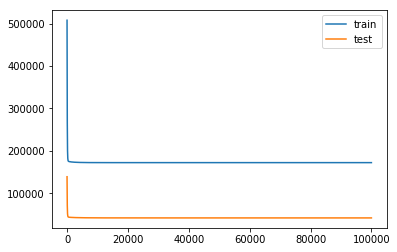

In [192]:
plt.plot(c_t,label='train')
plt.plot(c_v,label='test')
plt.legend()
plt.show()

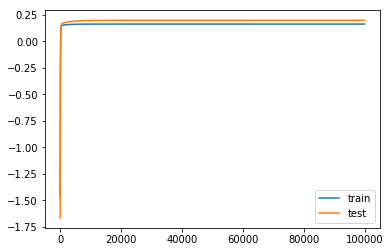

In [193]:
plt.plot(r2_t,label='train')
plt.plot(r2_v,label='test')
plt.legend()
plt.show()

In [194]:
import tensorflow as tf

C:\Users\ya391860\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [241]:
def feed_forward(X,W1,b1,W2,b2,W3,b3,W4,b4):
#     z=tf.tanh(tf.matmul(X,W1)+b1)
    z=tf.nn.tanh(tf.matmul(X,W1)+b1)
    z=tf.nn.sigmoid(tf.matmul(z,W2)+b2)
    z=tf.nn.relu(tf.matmul(z,W3)+b3)
    return (tf.tensordot(z,W4,axes=1)+b4)

In [231]:
def init_weights(shape,sd=0.01):
    return tf.Variable(tf.random_normal(shape,stddev=sd))
tfX=tf.placeholder(tf.float32,[None,D])
tfY=tf.placeholder(tf.float32,[None,])

In [242]:
M=3
K=5
J=10
W1=init_weights([D,M],np.sqrt(D))
b1=init_weights([M,])
W2=init_weights([M,K],np.sqrt(M))
b2=init_weights([K])
W3=init_weights([K,J],np.sqrt(K))
b3=init_weights([J,])
W4=init_weights([J,],np.sqrt(K))
b4=init_weights([1,])

In [243]:
y_p=feed_forward(tfX,W1,b1,W2,b2,W3,b3,W4,b4)
cost=tf.reduce_sum(tf.losses.mean_squared_error(labels=tfY,predictions=y_p))

In [244]:
train=tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

In [245]:
RSS=tf.reduce_sum(((tfY-y_p)**2))
TSS=tf.reduce_sum((tfY-tf.reduce_mean(tfY))**2)
r2=1-(RSS/TSS)

In [248]:
trained_weights=[]
trained_biases=[]

In [249]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    c=[]
    r2s=[]
    for i in range(100000):
        c.append(s.run(cost,feed_dict={tfX:X_n,tfY:y_n}))
        r2s.append(s.run(r2,feed_dict={tfX:X_n,tfY:y_n}))
        s.run(train,feed_dict={tfX:X_n,tfY:y_n})
        if i % 100==0:
            print('Epoch {0} Cost: {1} R2: {2}'.format(i,c[i],r2s[i]))
    trained_weights.append({'W1':s.run(W1),'W2':s.run(W2),'W3':s.run(W3),'W4':s.run(W4)})
    trained_biases.append({'b1':s.run(b1),'b2':s.run(b2),'b3':s.run(b3),'b4':s.run(b4),})

Epoch 0 Cost: 720.6991577148438 R2: -1.7445855140686035
Epoch 100 Cost: 226.44284057617188 R2: 0.1376543641090393
Epoch 200 Cost: 205.8825225830078 R2: 0.21595275402069092
Epoch 300 Cost: 199.81690979003906 R2: 0.23905199766159058
Epoch 400 Cost: 195.18836975097656 R2: 0.2566784620285034
Epoch 500 Cost: 190.6409454345703 R2: 0.27399611473083496
Epoch 600 Cost: 185.853759765625 R2: 0.29222679138183594
Epoch 700 Cost: 180.61053466796875 R2: 0.31219416856765747
Epoch 800 Cost: 175.39369201660156 R2: 0.33206111192703247
Epoch 900 Cost: 170.8291473388672 R2: 0.3494439125061035
Epoch 1000 Cost: 167.15280151367188 R2: 0.3634442687034607
Epoch 1100 Cost: 164.25119018554688 R2: 0.3744942545890808
Epoch 1200 Cost: 162.01364135742188 R2: 0.38301539421081543
Epoch 1300 Cost: 160.3072052001953 R2: 0.38951385021209717
Epoch 1400 Cost: 158.96070861816406 R2: 0.394641637802124
Epoch 1500 Cost: 157.862060546875 R2: 0.3988255262374878
Epoch 1600 Cost: 156.9374542236328 R2: 0.402346670627594
Epoch 1700 C

Epoch 13800 Cost: 139.43008422851562 R2: 0.46901869773864746
Epoch 13900 Cost: 139.33949279785156 R2: 0.4693636894226074
Epoch 14000 Cost: 139.24977111816406 R2: 0.46970534324645996
Epoch 14100 Cost: 139.16000366210938 R2: 0.4700471758842468
Epoch 14200 Cost: 139.07000732421875 R2: 0.4703899621963501
Epoch 14300 Cost: 138.9800567626953 R2: 0.47073251008987427
Epoch 14400 Cost: 138.89010620117188 R2: 0.47107505798339844
Epoch 14500 Cost: 138.7978973388672 R2: 0.47142618894577026
Epoch 14600 Cost: 138.7041015625 R2: 0.4717833995819092
Epoch 14700 Cost: 138.6084747314453 R2: 0.4721475839614868
Epoch 14800 Cost: 138.51573181152344 R2: 0.47250068187713623
Epoch 14900 Cost: 138.42161560058594 R2: 0.47285914421081543
Epoch 15000 Cost: 138.3270263671875 R2: 0.4732193350791931
Epoch 15100 Cost: 138.2295684814453 R2: 0.4735904932022095
Epoch 15200 Cost: 138.13076782226562 R2: 0.4739667773246765
Epoch 15300 Cost: 138.0314178466797 R2: 0.4743450880050659
Epoch 15400 Cost: 137.9232177734375 R2: 0.4

Epoch 27600 Cost: 125.04329681396484 R2: 0.5238068103790283
Epoch 27700 Cost: 124.8343505859375 R2: 0.5246025323867798
Epoch 27800 Cost: 124.62391662597656 R2: 0.5254038572311401
Epoch 27900 Cost: 124.4087142944336 R2: 0.5262234210968018
Epoch 28000 Cost: 124.18849182128906 R2: 0.5270620584487915
Epoch 28100 Cost: 123.94880676269531 R2: 0.5279748439788818
Epoch 28200 Cost: 123.64205932617188 R2: 0.5291430950164795
Epoch 28300 Cost: 123.31675720214844 R2: 0.5303818583488464
Epoch 28400 Cost: 123.01837158203125 R2: 0.5315181612968445
Epoch 28500 Cost: 122.70565032958984 R2: 0.5327091217041016
Epoch 28600 Cost: 122.40570068359375 R2: 0.5338513851165771
Epoch 28700 Cost: 122.13091278076172 R2: 0.5348978042602539
Epoch 28800 Cost: 121.88728332519531 R2: 0.5358256101608276
Epoch 28900 Cost: 121.64446258544922 R2: 0.536750316619873
Epoch 29000 Cost: 121.39991760253906 R2: 0.5376816391944885
Epoch 29100 Cost: 121.15283203125 R2: 0.5386226177215576
Epoch 29200 Cost: 120.9041748046875 R2: 0.5395

Epoch 41400 Cost: 103.8219223022461 R2: 0.6046226024627686
Epoch 41500 Cost: 103.79204559326172 R2: 0.6047363877296448
Epoch 41600 Cost: 103.762939453125 R2: 0.6048471927642822
Epoch 41700 Cost: 103.73214721679688 R2: 0.6049644947052002
Epoch 41800 Cost: 103.70252990722656 R2: 0.6050772666931152
Epoch 41900 Cost: 103.6737060546875 R2: 0.6051870584487915
Epoch 42000 Cost: 103.64547729492188 R2: 0.6052945256233215
Epoch 42100 Cost: 103.61785888671875 R2: 0.6053997278213501
Epoch 42200 Cost: 103.59097290039062 R2: 0.6055021286010742
Epoch 42300 Cost: 103.56475830078125 R2: 0.605601966381073
Epoch 42400 Cost: 103.53701782226562 R2: 0.605707585811615
Epoch 42500 Cost: 103.50924682617188 R2: 0.6058133840560913
Epoch 42600 Cost: 103.48177337646484 R2: 0.6059179306030273
Epoch 42700 Cost: 103.45500183105469 R2: 0.6060199737548828
Epoch 42800 Cost: 103.42900848388672 R2: 0.60611891746521
Epoch 42900 Cost: 103.4036865234375 R2: 0.6062153577804565
Epoch 43000 Cost: 103.3780288696289 R2: 0.6063130

Epoch 55200 Cost: 101.74292755126953 R2: 0.6125398874282837
Epoch 55300 Cost: 101.73506927490234 R2: 0.6125698089599609
Epoch 55400 Cost: 101.72725677490234 R2: 0.6125996112823486
Epoch 55500 Cost: 101.71920776367188 R2: 0.6126302480697632
Epoch 55600 Cost: 101.71110534667969 R2: 0.6126611232757568
Epoch 55700 Cost: 101.70301818847656 R2: 0.6126918792724609
Epoch 55800 Cost: 101.69499206542969 R2: 0.6127223968505859
Epoch 55900 Cost: 101.68637084960938 R2: 0.612755298614502
Epoch 56000 Cost: 101.67794799804688 R2: 0.6127873659133911
Epoch 56100 Cost: 101.66969299316406 R2: 0.6128188371658325
Epoch 56200 Cost: 101.66153717041016 R2: 0.6128498315811157
Epoch 56300 Cost: 101.65342712402344 R2: 0.6128807067871094
Epoch 56400 Cost: 101.6453857421875 R2: 0.6129113435745239
Epoch 56500 Cost: 101.6374282836914 R2: 0.6129416227340698
Epoch 56600 Cost: 101.6295166015625 R2: 0.6129717826843262
Epoch 56700 Cost: 101.62162780761719 R2: 0.613001823425293
Epoch 56800 Cost: 101.61376953125 R2: 0.61303

Epoch 69000 Cost: 100.75975799560547 R2: 0.6162840127944946
Epoch 69100 Cost: 100.75372314453125 R2: 0.6163070201873779
Epoch 69200 Cost: 100.74771881103516 R2: 0.6163299083709717
Epoch 69300 Cost: 100.74170684814453 R2: 0.6163527965545654
Epoch 69400 Cost: 100.7357406616211 R2: 0.6163754463195801
Epoch 69500 Cost: 100.72977447509766 R2: 0.6163982152938843
Epoch 69600 Cost: 100.72381591796875 R2: 0.6164209246635437
Epoch 69700 Cost: 100.71788787841797 R2: 0.6164434552192688
Epoch 69800 Cost: 100.71194458007812 R2: 0.6164661049842834
Epoch 69900 Cost: 100.70603942871094 R2: 0.6164885759353638
Epoch 70000 Cost: 100.70016479492188 R2: 0.6165109872817993
Epoch 70100 Cost: 100.69428253173828 R2: 0.6165333986282349
Epoch 70200 Cost: 100.68840789794922 R2: 0.6165557503700256
Epoch 70300 Cost: 100.68254852294922 R2: 0.6165780425071716
Epoch 70400 Cost: 100.67671203613281 R2: 0.6166002750396729
Epoch 70500 Cost: 100.67089080810547 R2: 0.6166224479675293
Epoch 70600 Cost: 100.66508483886719 R2: 

Epoch 82800 Cost: 100.01754760742188 R2: 0.6191105246543884
Epoch 82900 Cost: 100.01215362548828 R2: 0.6191310882568359
Epoch 83000 Cost: 100.00666046142578 R2: 0.6191519498825073
Epoch 83100 Cost: 100.00115203857422 R2: 0.6191729307174683
Epoch 83200 Cost: 99.99584197998047 R2: 0.6191931962966919
Epoch 83300 Cost: 99.99037170410156 R2: 0.6192139983177185
Epoch 83400 Cost: 99.98514556884766 R2: 0.6192339658737183
Epoch 83500 Cost: 99.97954559326172 R2: 0.6192553043365479
Epoch 83600 Cost: 99.97391510009766 R2: 0.6192767024040222
Epoch 83700 Cost: 99.968505859375 R2: 0.6192972660064697
Epoch 83800 Cost: 99.96295928955078 R2: 0.619318425655365
Epoch 83900 Cost: 99.95751953125 R2: 0.619339108467102
Epoch 84000 Cost: 99.95219421386719 R2: 0.6193593740463257
Epoch 84100 Cost: 99.94676971435547 R2: 0.6193801164627075
Epoch 84200 Cost: 99.94132995605469 R2: 0.6194007396697998
Epoch 84300 Cost: 99.9360580444336 R2: 0.6194208860397339
Epoch 84400 Cost: 99.9306640625 R2: 0.6194413900375366
Epoch

Epoch 96800 Cost: 99.33091735839844 R2: 0.6217253804206848
Epoch 96900 Cost: 99.3254623413086 R2: 0.6217461824417114
Epoch 97000 Cost: 99.31881713867188 R2: 0.6217714548110962
Epoch 97100 Cost: 99.30912017822266 R2: 0.6218084096908569
Epoch 97200 Cost: 99.30097961425781 R2: 0.6218394041061401
Epoch 97300 Cost: 99.29354858398438 R2: 0.6218676567077637
Epoch 97400 Cost: 99.28604125976562 R2: 0.6218962669372559
Epoch 97500 Cost: 99.2793197631836 R2: 0.6219218969345093
Epoch 97600 Cost: 99.27262878417969 R2: 0.6219473481178284
Epoch 97700 Cost: 99.26620483398438 R2: 0.621971845626831
Epoch 97800 Cost: 99.25990295410156 R2: 0.6219958066940308
Epoch 97900 Cost: 99.25395965576172 R2: 0.6220184564590454
Epoch 98000 Cost: 99.24748229980469 R2: 0.6220431327819824
Epoch 98100 Cost: 99.24178314208984 R2: 0.6220648288726807
Epoch 98200 Cost: 99.2354965209961 R2: 0.6220887899398804
Epoch 98300 Cost: 99.22984313964844 R2: 0.6221102476119995
Epoch 98400 Cost: 99.22367095947266 R2: 0.6221337914466858
E

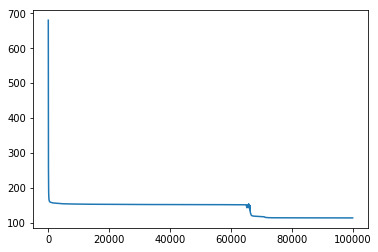

In [214]:
plt.plot(c)

# tanh activation

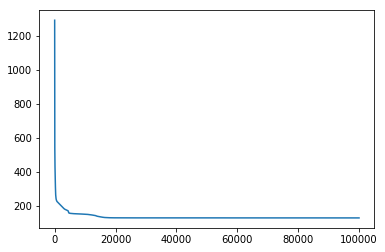

In [229]:
# relu
plt.plot(c)

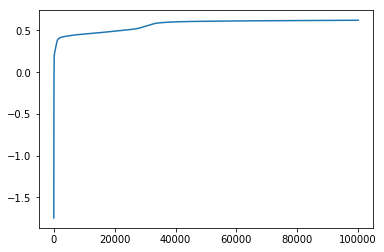

In [251]:
plt.plot(r2s)

In [255]:
trained_weights[0]['W1']

array([[ 6.050372  , -2.1149921 ,  0.06881495],
       [-1.8656454 ,  0.38090482, -0.06608202],
       [ 1.3412274 , -0.98286885,  0.5712453 ],
       [-0.21167055,  1.8437498 , -1.1606691 ],
       [-0.7103661 ,  2.6991935 ,  5.507528  ]], dtype=float32)

In [256]:
np.savez('Weights',W1=trained_weights[0]['W1'],W2=trained_weights[0]['W2'],W3=trained_weights[0]['W3'],W4=trained_weights[0]['W4'])

In [257]:
np.savez('Biases',b1=trained_biases[0]['b1'],b2=trained_biases[0]['b2'],b3=trained_biases[0]['b3'],b4=trained_biases[0]['b4'],)